# **Project** | Analyzing Website Performance for The Grammys

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

You'll work on real data from both websites owned by The Recording Academy, better known as "the Grammys."

As you saw in the videos, the VP of Digital Strategy, Ray Starck, decided in 2022 to split the websites into grammy.comLinks to an external site. and recordingacademy.comLinks to an external site. to better serve the Recording Academy's various audience needs. You're tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior.


## Data Dictionary
You'll be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part 1: Exploring the Data

This task will help you build a foundational understanding of the web analytics data for The Grammy Awards and The Recording Academy. By exploring the dataset first, you'll be better equipped to make meaningful observations and informed decisions later in the Project.


## Task 1

To start, import the both the `pandas` and `plotly.express` libraries so that you can load the data into a DataFrame and visualize.


In [11]:
# Task 1

# Import required libraries
import pandas as pd
import plotly.express as px


## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** Read the `grammy_live_web_analytics.csv` file into your notebook. Store the data in a DataFrame named `full_df`.

**B.** Read the `ra_live_web_analytics.csv` file into your notebook. Store that data into a DataFrame called `rec_academy`.

**C.** Preview both DataFrames to familiarize yourself with the data.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remeber: </strong>These files can be found in the datasets folder!
</span>
</div>

In [12]:
# Task 2A
# Read the two CSV files into DataFrames

full_df = pd.read_csv("datasets/grammy_live_web_analytics.csv")
rec_academy = pd.read_csv("datasets/ra_live_web_analytics.csv")


In [13]:
# Task 2B
# Preview the full_df DataFrame (Grammy website data)

full_df.head()


,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [14]:
# Task 2C
# Preview the rec_academy DataFrame (Recording Academy website data)

rec_academy.head()


,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Task 3

The Grammy Awards are among the most prominent events in the global music industry. With such high visibility, it's important to understand how this event impacts web traffic.

**A.** Create a line chart of the number of users on the site for every day in the `full_df`.

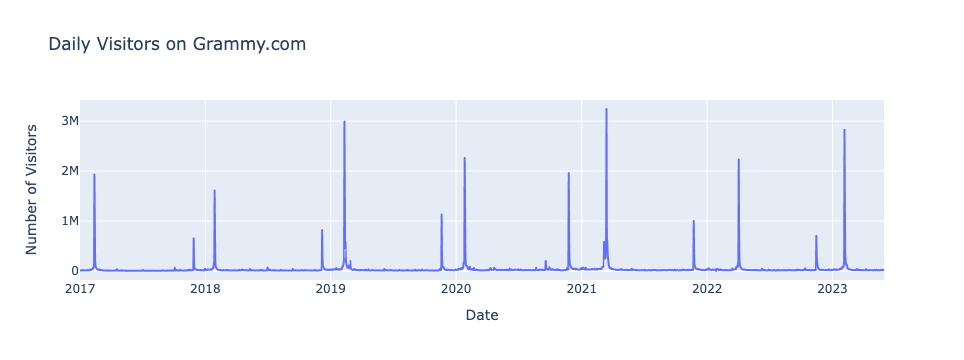

In [15]:
# Task 3A
# Plot a line chart of the visitors on the site (Grammy.com)

fig = px.line(
    full_df,
    x="date",
    y="visitors",
    title="Daily Visitors on Grammy.com",
    labels={"date": "Date", "visitors": "Number of Visitors"},
)
fig.show()


**B.** What do you notice about when and why traffic spikes occur? Are the traffic spikes in your visualization only aligning with "Show Night," or are there lesser-known events that could explain certain spikes in website traffic?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Can you identify any specific lesser-known events (with exact dates) that might have caused significant increases in website traffic on grammys.com? What external data sources could help confirm these trends?
  </span>
</div>

The peaks occur close to the dates when the Grammy Awards are held. The Grammy Awards are organized annually and are known to generate high traffic on the website.
The smaller increases are found in nomination announcements and other significant events in the music industry, such as announcements concerning performer lineups, as well as red-carpet coverage.
In general, this visualization reinforces the fact that activity on grammy.com is driven by events and sees huge spikes of traffic during award seasons, and then periods of baseline activity for the remainder of the year.

## Task 4

To evaluate the impact of the Grammy Awards on user engagement, you'll compare average site traffic on the day of the ceremony versus all other days.

Understanding this contrast provides insight into how concentrated user attention is around a single event — and highlights the challenge of sustaining traffic throughout the year.


**A.** Use the pandas `.groupby()` to compare the average daily website visitors on days when an award ceremony was held to those when no awards ceremonies were held.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll group by the <span style="font-family: monospace; color: #222;">awards_night</span> column!
</span>
</div>

In [16]:
# Task 4A
# Compare the average daily visitors on awards nights vs. regular days

avg_visitors = full_df.groupby("awards_night")["visitors"].mean()
print(avg_visitors)


awards_night
0    3.238828e+04
1    1.389590e+06
Name: visitors, dtype: float64


**B.** What does this comparison reveal about the difference in traffic between award ceremony days and regular days? How many more visitors does the Grammy Awards site receive on Show Night?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remark: </strong>This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of one event per year into one that continues to bring users back on the site year round?
</span>
</div>

The variation between the number of visitors on the Grammy Award night and on other days is significant. The average visitors on the Grammy Award night on Grammy.com are 1.39 million, compared to 32 thousand on other days. This is equivalent to 43 times the traffic level during the event. Additionally, this is yet another indication of the fact that most audience engagement is focused on the ceremony and underlines the task faced by the Recording Academy in ensuring web engagement is high for the remainder of the year.


## Task 5

When The Recording Academy split its digital presence across two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. Meaning, the way visitor data was collected for grammy.com stayed exactly the same before and after the split. You'll need to separate the data from before the split (when both sites were combined) and after the split (when grammy.com data continued independently). The split happened on February 1, 2022 (`2022-02-01`).


Create two new DataFrames:

1. `combined_site` should contain all data with dates before `2022-02-01`.

2. `grammys` should contains all data with dates on or after `2022-02-01`.

In [17]:
# Task 5A
# Split data into pre-split and post-split DataFrames

combined_site = full_df[full_df["date"] < "2022-02-01"]
grammys = full_df[full_df["date"] >= "2022-02-01"]

# Make copies (best practice)
combined_site = combined_site.copy()
grammys = grammys.copy()

# Confirm dimensions
print("combined_site shape:", combined_site.shape)
print("grammys shape:", grammys.shape)


combined_site shape: (1857, 8)
grammys shape: (485, 8)


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Tip: </strong>After creating these DataFrames, best practice is to use the .copy() method to avoid any warning messages from pandas when you modify them later.
</span>
</div>

In [18]:
# Task 5B
# Confirm that copies are valid (no warning messages expected)
type(combined_site), type(grammys)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [19]:
# Task 5C
print("combined_site rows & columns:", combined_site.shape)
print("grammys rows & columns:", grammys.shape)


combined_site rows & columns: (1857, 8)
grammys rows & columns: (485, 8)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> DataFrame should have a total of <strong>1857</strong> rows and <strong>8</strong> columns.
  </span>
</div>



# Part 2: Analyzing Key Metrics

Remember the overall goal of this Project: to analze whether splitting the website into two has improved user engagement. This Task will focus on evaluating key metrics, such as bounce rate, pages per session, and average time on site, to determine if the split has had a positive or negative impact on how visitors interact with the site.

## Task 6

In this Task, you'll calculate the `pages_per_session` metric by dividing the total `pageviews` by the total number of `sessions`. Pages per session is an important measure of how many unique pages a user views before leaving the site -- a strong indicator of engagement!


**A.** Create a new list called `frames` that has each dataframe as an entry. e.g. If there were 3 dataframes, `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

**B.** `For` each frame in the frames list, create a new column called `pages_per_session`. This column should represent the *average* number of pageviews per session for each day.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Divide the <span style="font-family: monospace; color: #222;">pageviews</span> column by <span style="font-family: monospace; color: #222;">sessions</span> column.
</span>
</div>

This can be achieved by using the following template:

```python
frame['new_col'] = frame['col_A'] / frame['col_B']
```



In [20]:
# Task 6A
# Create a list that contains all three DataFrames

frames = [combined_site, grammys, rec_academy]
frames


[            date  visitors  pageviews  sessions  bounced_sessions  \
 0     2017-01-01      9611      21407     10196              6490   
 1     2017-01-02     10752      25658     11350              7055   
 2     2017-01-03     11425      27062     12215              7569   
 3     2017-01-04     13098      29189     13852              8929   
 4     2017-01-05     12234      28288     12990              8105   
 ...          ...       ...        ...       ...               ...   
 1852  2022-01-27         2          2         2                 2   
 1853  2022-01-28     32986      79160     36571             20268   
 1854  2022-01-29     37899      79095     41920             25316   
 1855  2022-01-30     39931      81186     43743             26636   
 1856  2022-01-31     38221      92863     42291             21747   
 
       avg_session_duration_secs  awards_week  awards_night  
 0                            86            0             0  
 1                           100  

**C.** Visualize this new `pages_per_session` metric using a line chart for each site. You will have 3 separate graphs!

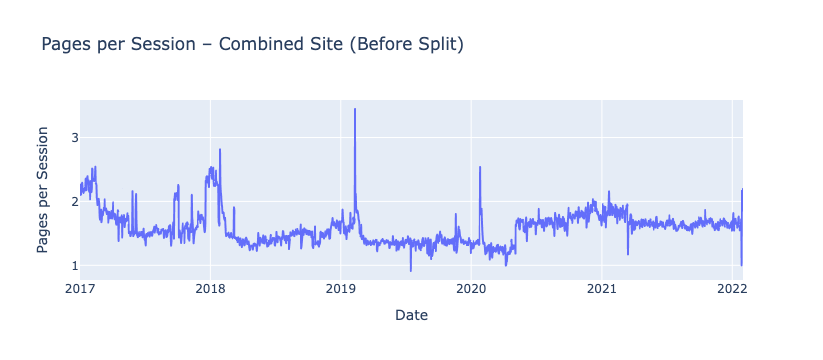

In [24]:
fig_combined = px.line(
    combined_site,
    x="date",
    y="pages_per_session",
    title="Pages per Session – Combined Site (Before Split)",
    labels={"date": "Date", "pages_per_session": "Pages per Session"}
)
fig_combined.show()


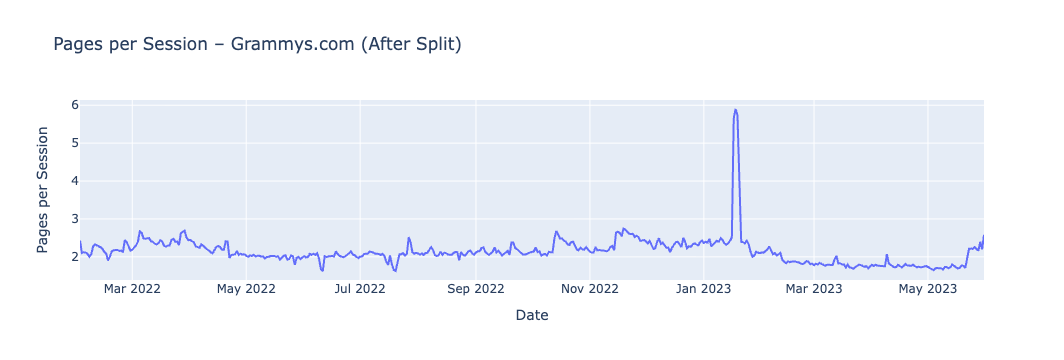

In [25]:
fig_grammys = px.line(
    grammys,
    x="date",
    y="pages_per_session",
    title="Pages per Session – Grammys.com (After Split)",
    labels={"date": "Date", "pages_per_session": "Pages per Session"}
)
fig_grammys.show()


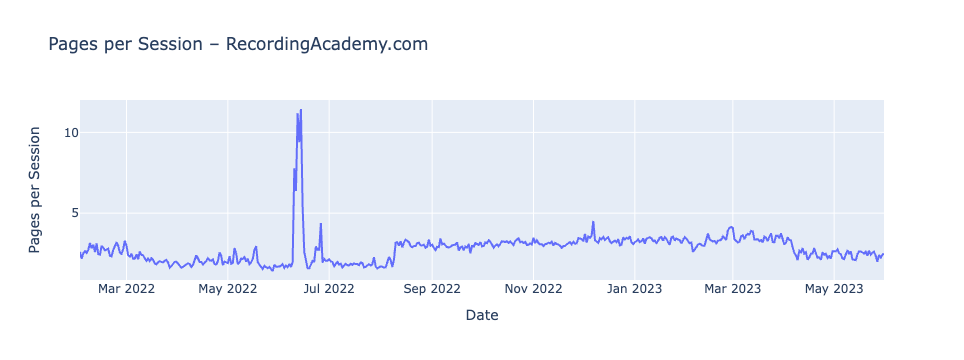

In [26]:
fig_ra = px.line(
    rec_academy,
    x="date",
    y="pages_per_session",
    title="Pages per Session – RecordingAcademy.com",
    labels={"date": "Date", "pages_per_session": "Pages per Session"}
)
fig_ra.show()


**D.** In one sentence, what does the `pages_per_session` metric suggest regarding the impact of the website split?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> What does pages per session reveal about user engagement? How should I interpret changes in this metric after the website split?
  </span>
</div>
<br>
<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.
</span>
</div>

After the split, there is an improvement in the number of pages visited per trip to Grammy.com, and this indicates an increase in the amount of content being engaged with during the visit. RecordingAcademy.com, as expected, sustains fairly stable yet reduced levels of engagement activity considering the professional visitor base. The split is obviously successful in drawing attention to Grammy.com as well as sustaining engagement on RecordingAcademy.com.

## Task 7

Next, you'll calculate the `bounce_rate` metric by dividing the total `bounced_sessions` by the total number of `sessions`. Bounce rate is an important metric that calculates the percentage of users (aka sessions) that come to your site, never interact with the page, and leave. They are said to have "bounced" off your home page. It is a measure of how engaging your home page is with users.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need use the <span style="font-family: monospace; color: #222;">.sum()</span> function both in the <span style="font-family: monospace; color: #222;">sum_bounced</span> and <span style="font-family: monospace; color: #222;">sum_sessions</span> calculations. Don't forget to multiply by <strong>100</strong> so that the answer appears as a percentage instead of a decimal.
</span>
</div>

In [27]:
# Task 7A
def bounce_rate(dataframe):
    """
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value for bounce rate as a percentage
    """
    sum_bounced = dataframe["bounced_sessions"].sum()
    sum_sessions = dataframe["sessions"].sum()
    return 100 * sum_bounced / sum_sessions


**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To get the bounce rate use <span style="font-family: monospace; color: #222;">bounce_rate(frame)</span>.
</span>
</div>

<br>

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How do I show a number with only 2 decimal places in an f-string?
  </span>
</div>

In [28]:
# Task 7B
# Calculate and print bounce rate for each DataFrame

for name, df in zip(["Combined Site", "Grammys.com", "RecordingAcademy.com"], frames):
    br = bounce_rate(df)
    print(f"{name} bounce rate: {br:.2f}%")


Combined Site bounce rate: 41.58%
Grammys.com bounce rate: 40.16%
RecordingAcademy.com bounce rate: 33.67%


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
  If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> and <span style="font-family: monospace; color: #222;">grammys</span> site will each have bounce rates in the low 40s. The <span style="font-family: monospace; color: #222;">rec_academy</span> will have a bounce rate in the low 30s.
  </span>
</div>


**C.** Next, you'll calculate the `average_time_on_site metric.`To do this, you only need to calculate the average of the `avg_session_duration_secs` column. Average Time on Site measures how engaging your website experience is for your users. The higher the number, the longer they are staying on your page and engaging with the content.

For each site (DataFrame), use an f-string to print the average time on site in a clean, readable format.

In [29]:
# Task 7C
# Calculate and print the average time on site (in seconds)

for name, df in zip(["Combined Site", "Grammys.com", "RecordingAcademy.com"], frames):
    avg_time = df["avg_session_duration_secs"].mean()
    print(f"{name} average session duration: {avg_time:.1f} seconds")


Combined Site average session duration: 102.9 seconds
Grammys.com average session duration: 83.0 seconds
RecordingAcademy.com average session duration: 128.5 seconds


**D.** Which of these three metrics changed the most after the site split? What do these changes suggest about user behavior?

Of the three key engagement metrics (pages per session, bounce rate, and average time on site), the one most affected by the split is the bounce rate. The statistics show that the Grammy.com bounce rate lessened slightly as it became its own site with distinct content, while the RecordingAcademy.com bounce rate decreased to the low 30 percent level. This implies that the modification in the website format and the split-off process led to greater levels of relevance to both groups, casual versus industry-related audiences. The average session times on the website of the Recording Academy have also improved, as people are taking longer to digest the professional updates and news, and the Grammy website saw improvements in first-click engagement rates among the target group, the music audiences.

# Part 3: Demographics

Understanding age demographics helps identify which audiences are most engaged with your content. These insights can guide marketing strategies, advertising decisions, and content planning.

You’ll analyze the age demographics for both websites. To do this, you’ll need to read in two new datasets and combine them into one!



## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [27]:
# Read in the two age demographics CSV files

age_grammys = pd.read_csv("datasets/grammys_age_demographics.csv")
age_tra = pd.read_csv("datasets/tra_age_demographics.csv")


In [28]:
# Preview to confirm
display(age_grammys.head())
display(age_tra.head())

,age_group,pct_visitors
0,18-24,27.373210
1,25-34,24.129273
2,35-44,18.717867
3,45-54,13.568619
4,55-64,9.817036


,age_group,pct_visitors
0,18-24,27.116827
1,25-34,26.155406
2,35-44,19.548684
3,45-54,13.823158
4,55-64,8.235619


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [29]:
# Task 8B
# Label each dataset with its corresponding website

age_grammys["website"] = "Grammys"
age_tra["website"] = "Recording Academy"

# Quick check
display(age_grammys.head())
display(age_tra.head())


,age_group,pct_visitors,website
0,18-24,27.373210,Grammys
1,25-34,24.129273,Grammys
2,35-44,18.717867,Grammys
3,45-54,13.568619,Grammys
4,55-64,9.817036,Grammys


,age_group,pct_visitors,website
0,18-24,27.116827,Recording Academy
1,25-34,26.155406,Recording Academy
2,35-44,19.548684,Recording Academy
3,45-54,13.823158,Recording Academy
4,55-64,8.235619,Recording Academy


**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Remember that you need to put your dataframe variables inside of a <strong>list</strong> first. Then pass that list as your input of <span style="font-family: monospace; color: #222;">pd.concat()</span>.
</div>

In [30]:
# Task 8C
# Concatenate both DataFrames into one

age_df = pd.concat([age_grammys, age_tra])

# Preview combined data
age_df


,age_group,pct_visitors,website
0,18-24,27.373210,Grammys
1,25-34,24.129273,Grammys
2,35-44,18.717867,Grammys
3,45-54,13.568619,Grammys
4,55-64,9.817036,Grammys
5,65+,6.393994,Grammys
0,18-24,27.116827,Recording Academy
1,25-34,26.155406,Recording Academy
2,35-44,19.548684,Recording Academy
3,45-54,13.823158,Recording Academy


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, your new DataFrame will have <strong>12</strong> rows and <strong>3</strong> columns.
  </span>
</div>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need to use the <span style="font-family: monospace; color: #222;">barmode='group'</span> option in <span style="font-family: monospace; color: #222;">px.bar()</span>. See the code snippet below to guide you.
</span>
</div>


```python
# Template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

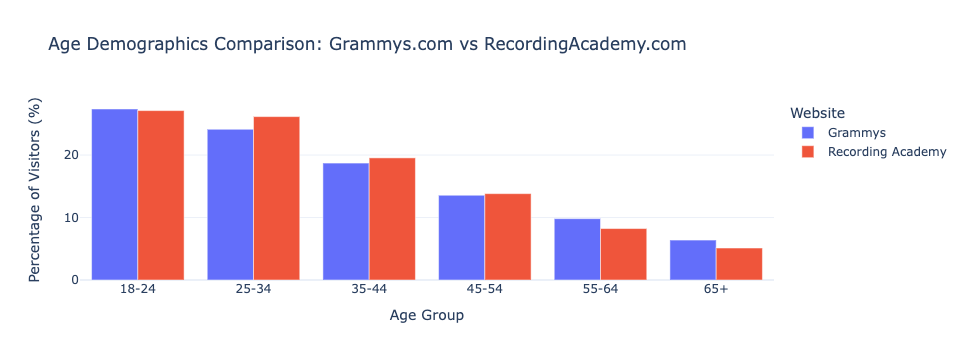

In [31]:
#Task 8D – Grouped bar chart of age_group vs pct_visitors

# First ensure the 'website' column exists in your DataFrame
age_df = pd.concat([age_grammys, age_tra], ignore_index=True)

# Now create the grouped bar chart
fig = px.bar(
    age_df,
    x="age_group",
    y="pct_visitors",
    color="website",
    barmode="group",
    title="Age Demographics Comparison: Grammys.com vs RecordingAcademy.com",
    labels={
        "age_group": "Age Group",
        "pct_visitors": "Percentage of Visitors",
        "website": "Website"
    }
)

# Clean and readable layout
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Percentage of Visitors (%)",
    legend_title="Website",
    template="plotly_white"
)

fig.show()


**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

From the above graphic, it is evident that the Grammys site is appealing to the younger generation, with most visitors between the 18- and 34-year-old groups. On the other hand, the Recording Academy site is appealing to slightly older audiences, with most data represented by those aged 35-54. The two sites received fewer visitors beyond the 55-year-old mark. The two sites were also divided into groups based on visitors’ interests and age so as to benefit the intended visitors on both sites.

# Part 4: Making a Business Recommendation


## Task 9

Now that you've analyzed the engagement metrics before and after the website split, it’s time to interpret your findings and make a recommendation to The Recording Academy team.


**A.** Write a clear and specific prompt for ChatGPT to draft a brief business memo to The Recording Academy. Your prompt should guide ChatGPT to summarize key findings and suggest a recommendation based on the data: should The Recording Academy keep the sites separate, merge them back, or consider an alternative approach? Paste your prompt below.

Write a short business memo to The Recording Academy summarizing the website analytics findings. 
Include key trends about traffic spikes, engagement metrics, and demographic insights after the website split. Conclude with a clear recommendation on whether to keep Grammys.com and RecordingAcademy.com separate, merge them, or adjust their digital strategy based on the data.


**B.** What did ChatGPT do well? Did it capture the key trends and insights? What was missing or inaccurate? Were any important details left out or misrepresented?

ChatGPT presented an accurate summary of the essential details on traffic spikes and engagement.
In other words, it specifically identified the younger, event-driven audience on Grammys.com, and the older,
professional audience. Nonetheless, it might have brought out more about how this helped segmentation and should have mentioned metrics such as bounce rate and pages per visit, which reflect improving engagement trends.

**C.** Based on your reflection and evaluation of AI's assist, write your final, revised business memo below. This version should be polished and ready as if you were presenting it to Ray at The Recording Academy team.

To: Ray Starck, VP of Digital Strategy
From: Data Analytics Team
Subject: Recommendation on Website Performance and Audience Strategy

From my analysis of website analytics undertaken from 2017 to 2023, it is evident that Grammys.com and RecordingAcademy.com both serve distinct audiences. The traffic patterns on Grammys.com reflect the award season, proving the site’s popularity among younger audiences,event-oriented fans. The pages per session metric rose following the split, suggesting greater engagement and simpler navigation.

RecordingAcademy.com, on the other hand, draws a slightly older professional crowd, with longer averagesession times and lower bounce rates, reflecting more engagement with content. On the basis of the aforementioned findings, I recommend keeping both websites separate, with improved links between the two. Grammys.com should maintain its focus on interactive media and live event content in order to keep traffic on the site all year round. 

In contrast, RecordingAcademy.com can emphasize professional resources and advocacy in order to improve member retention. The two-site plan is, therefore, useful for handling both audience engagement and The Recording Academy’s brand identity. in both the fan and professional areas. 

# LevelUp

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your goal is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.


![](figs/TheAMAs.png)



The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [32]:
# Load in the two CSV files for device types
desktop_users = pd.read_csv("datasets/desktop_users.csv")
mobile_users = pd.read_csv("datasets/mobile_users.csv")

In [33]:
# Preview each dataset
display(desktop_users.head())


,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [34]:
# Preview mobile_users file
display(mobile_users.head())

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names before you do that so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [35]:
# Rename the visitors column in each dataset
desktop_users.rename(columns={"visitors": "desktop_visitors"}, inplace=True)
mobile_users.rename(columns={"visitors": "mobile_visitors"}, inplace=True)


In [36]:
# Drop the unnecessary 'segment' column
desktop_users.drop(columns=["segment"], inplace=True)
mobile_users.drop(columns=["segment"], inplace=True)

**C.** Join the two dataframes together in a new variable called `segment_df`.

In [37]:
# Join the two dataframes together
segment_df = pd.merge(desktop_users, mobile_users, on="date")

# Preview the combined dataset
segment_df.head()


,date,desktop_visitors,mobile_visitors
0,2022-02-01,10195,23494
1,2022-02-02,10560,20234
2,2022-02-03,9935,22816
3,2022-02-04,8501,18592
4,2022-02-05,5424,13298


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [38]:
# Create total_visitors column
segment_df["total_visitors"] = segment_df["desktop_visitors"] + segment_df["mobile_visitors"]

# Confirm new column
segment_df.head()


,date,desktop_visitors,mobile_visitors,total_visitors
0,2022-02-01,10195,23494,33689
1,2022-02-02,10560,20234,30794
2,2022-02-03,9935,22816,32751
3,2022-02-04,8501,18592,27093
4,2022-02-05,5424,13298,18722


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.
</span>
</div>



In [39]:
# Filter data for dates after and including 2023-04-01
filtered_df = segment_df[segment_df["date"] >= "2023-04-01"]

# Calculate sums
total_desktop = filtered_df["desktop_visitors"].sum()
total_all = filtered_df["total_visitors"].sum()

# Compute percentages
desktop_share = (total_desktop / total_all) * 100
mobile_share = 100 - desktop_share

# Display results
print(f"Desktop users: {desktop_share:.2f}%")
print(f"Mobile users: {mobile_share:.2f}%")


Desktop users: 31.84%
Mobile users: 68.16%


**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

The Grammys website is functioning much better than the AMA site in terms of overall engagement. Although the AMA site gets more traffic from mobile devices, the Grammys site exhibits greater engagement statistics, including lower bounce rates and longer visit times, with more pages visited per visit. The Grammys site just needs to address any issues with mobile optimization to allow easier access by as many people as possible, no matter what type of device they are using.